In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Heart_disease_statlog.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
print("The number of patients is - ",len(data))

The number of patients is -  270


<AxesSubplot:xlabel='target', ylabel='count'>

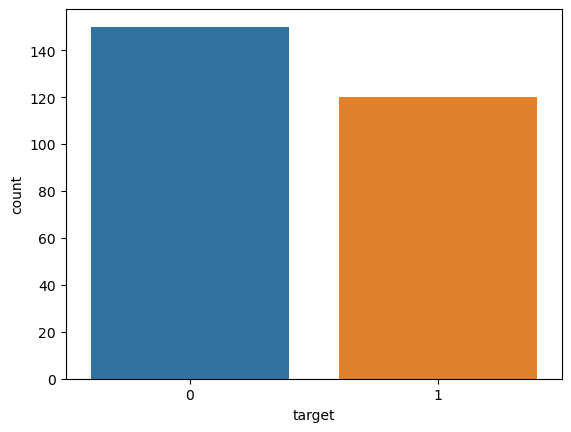

In [5]:
sns.countplot(x='target',data=data)

<AxesSubplot:xlabel='target', ylabel='count'>

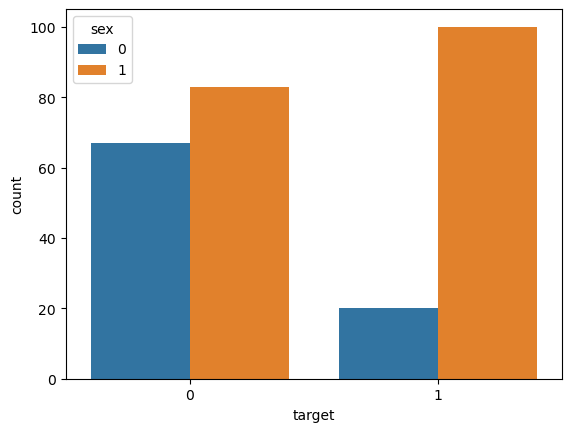

In [6]:
sns.countplot(x='target',hue='sex',data=data)
#0 - FEMALE
#1 - MALE

<AxesSubplot:xlabel='age', ylabel='count'>

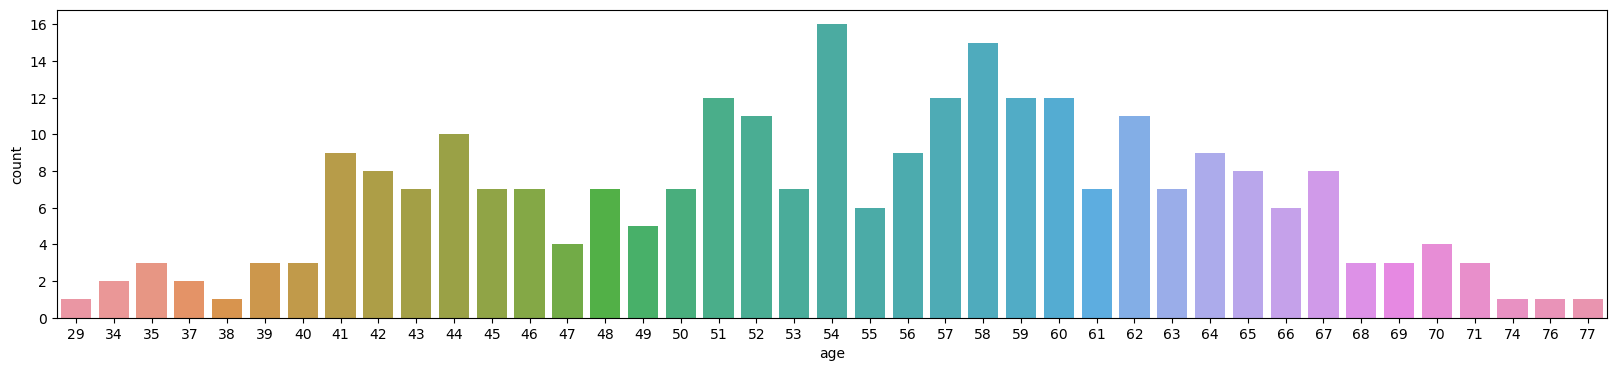

In [8]:
plt.figure(figsize=(20,4))
sns.countplot(x='age',data=data)

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='age'>

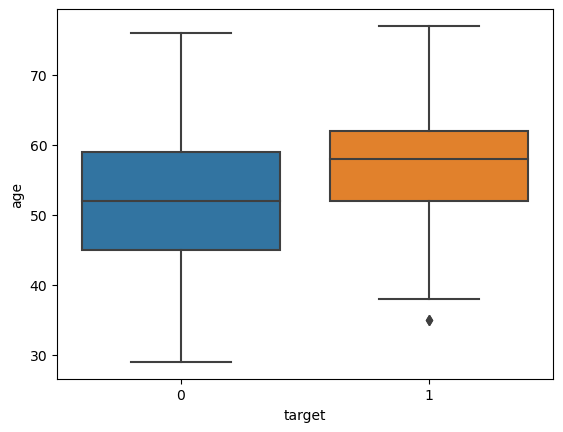

In [11]:
sns.boxplot(x="target",y="age",data=data)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data.drop('target',axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log = LogisticRegression()

In [17]:
log.fit(X_train,y_train)

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions = log.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.90      0.84        42\n           1       0.88      0.74      0.81        39\n\n    accuracy                           0.83        81\n   macro avg       0.84      0.82      0.82        81\nweighted avg       0.83      0.83      0.83        81\n'

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.8271604938271605

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[38,  4],
       [10, 29]], dtype=int64)